In [1]:
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
def autocorr(y):
    x = y.copy()
    x -= np.mean(x)
    x /= np.std(x)
    result = np.correlate(x, x, mode='full')/len(x)
    return result[result.size//2:]

import os

filename = "data/stat_h_{h:.4f}_beta_{beta:.4f}_L_{L}_T_{t}.data"
execstring = "./a.exe -t {t} -h {h:.4f} -l {L} -b {beta:.4f}"

const_args = dict(h=0.0, L=50, t=55_000)

for beta in np.linspace(0.01, 2.0, 20):
    os.system(execstring.format(beta=beta, **const_args))

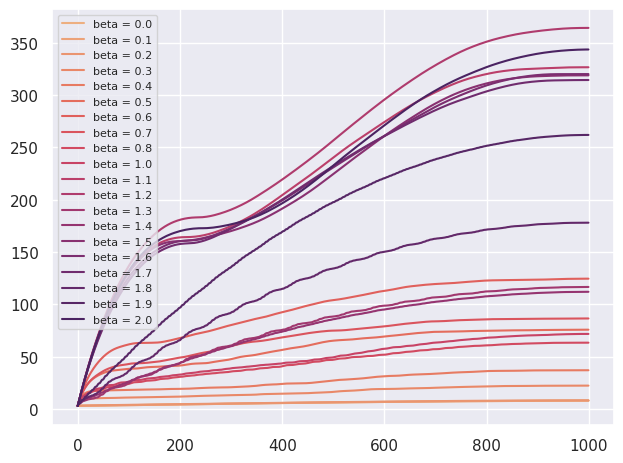

In [108]:
import seaborn as sns
sns.set()
colors = sns.color_palette("flare", 20, as_cmap=True)
for beta in np.linspace(0.01, 2.0, 20):
    m, h = np.loadtxt(filename.format(beta=beta, **const_args), unpack=True)
    m = m[5000:]
    h = h[5000:]
    autocorrs = [autocorr(m[1000*i:(i+1)*1000]) for i in range(50)]
    mean_autocorr = np.mean(autocorrs, axis=0)
    sns.lineplot(x=range(len(mean_autocorr)),y=1+2*np.cumsum(np.abs(mean_autocorr)), label = f"beta = {beta:.1f}", c=colors(beta/2))
plt.legend(fontsize=8)

In [97]:
m,h = np.loadtxt(filename.format(beta=.74320, **const_args), unpack=True)
m , h = m[5000:], h[5000:]
autocorrs = [autocorr(m[i*1000:(i+1)*1000]) for i in range(50)]
cumulatives = [np.cumsum(np.abs(a)) for a in autocorrs]

(0.0, 400.0)

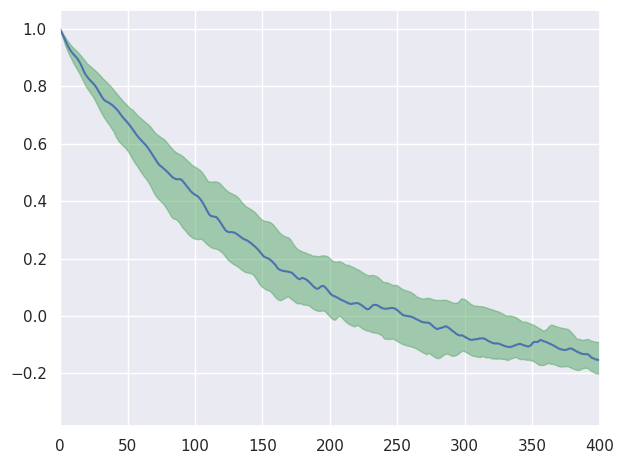

In [113]:
u, m, l = np.quantile(autocorrs, [0.3, 0.5, 0.7], axis=0)
plt.plot(m)
plt.fill_between(range(len(m)), l,u, color="g", alpha=0.5)
plt.xlim(0,400)

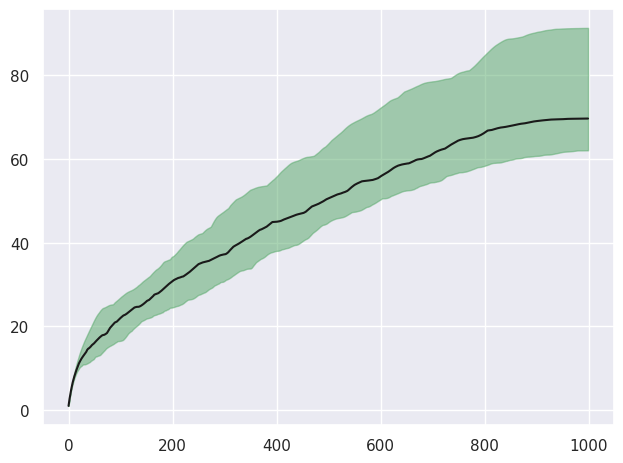

In [115]:
u, m, l = np.quantile(cumulatives, [0.3, 0.5, 0.7], axis=0)
plt.plot(m, color="k")
plt.fill_between(range(len(m)), l,u, color="g", alpha=0.5)


<ErrorbarContainer object of 3 artists>

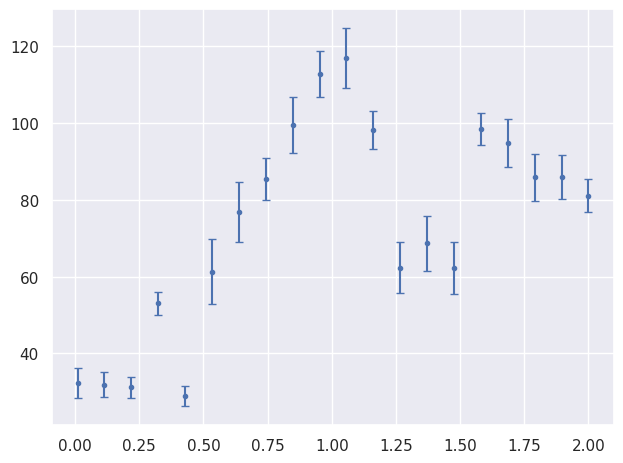

In [138]:
tau = []
tau_std = []
for beta in np.linspace(0.01, 2.0, 20):
    m, h = np.loadtxt(filename.format(beta=beta, **const_args), unpack=True)
    m = m[5000:]
    h = h[5000:]

    autocorrs = [autocorr(h[1000*i:(i+1)*1000]) for i in range(50)]
    integrated_abs_autocorrs = [np.sum(np.abs(a)) for a in autocorrs]
    tau.append(np.mean(integrated_abs_autocorrs))
    tau_std.append(np.std(integrated_abs_autocorrs))

plt.errorbar(np.linspace(0.01, 2.0, 20), tau, tau_std, ls="", marker=".")

In [136]:
m,h = np.loadtxt(filename.format(h=0, beta=1.6858, L=10, t=55000), unpack=True)

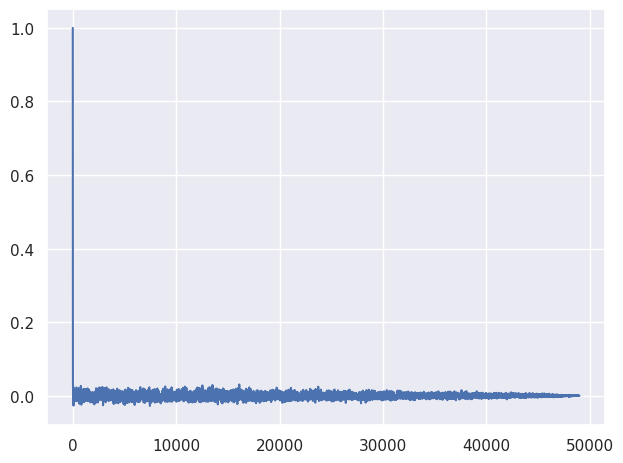

In [137]:
plt.plot(autocorr(h[6000:]))